In [2]:
# 패션데이터 읽어들이고, 훈련/테스트 데이터 셋 분류하기 

In [9]:
import tensorflow as tr
from tensorflow import keras

In [10]:
# 케라스 내부의 fashion_mnist 이라는 데이터를 불러옴
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [11]:
# 255의 의미? => 
train_scaled = train_input / 255.0
train_scaled.shape

(60000, 28, 28)

In [12]:
# 라이브러리 호출 
from sklearn.model_selection import train_test_split

train_scaled, val_scaled,train_target, val_target = \
train_test_split (train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, train_target.shape)
print (val_scaled.shape, val_target.shape)


(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


In [16]:
# 신경망 모델 및 신경망층 생성 함수 만들기 

def model_fn(add_layer=None) :
    model = keras.Sequential()
    # 전처리 층 : 1차원으로 만들기 
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    # 은닉층(hidden layer) : 훈련에 관여 
    model.add(keras.layers.Dense(100,activation="relu"))
    
    if add_layer : 
        model.add(add_layer)
        
    #출력층 
    model.add(keras.layers.Dense(10,activation="softmax"))
    
    return model 

In [17]:
# 반복 5번을 수행하는 모델 생성하기 
model5 = model_fn()
model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [18]:
# 모델 설정하기 
model5.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
model5

In [22]:
# verbose : 0~2의 값 사용하여 출력결과 선택 가능
# - 1 : 전체 다 보여주기 (기본값) -> 주로 사용
# - 2 : 결과값만 보여주기 (진행bar가 안보임)
# - 0 : 아무것도 안보여주기(속도를 향상시키지만, 결과값 확인은 어려움)
history5 = model5.fit(train_scaled, train_target, epochs=5, verbose=1)
history5

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2463 - accuracy: 0.9148
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2423 - accuracy: 0.9164
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2399 - accuracy: 0.9182
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2336 - accuracy: 0.9204
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2327 - accuracy: 0.9215


In [27]:
# 훈련결과 확인하기 
print("반복횟수:", history5.epoch)
print("손실계수/정확도 : ", history5.history)
print("훈련결과 키워드 : ", history5.history.keys())

반복횟수: [0, 1, 2, 3, 4]
손실계수/정확도 :  {'loss': [0.2462751865386963, 0.24225714802742004, 0.23986174166202545, 0.2336031049489975, 0.2327021211385727], 'accuracy': [0.9148333072662354, 0.9163749814033508, 0.9181874990463257, 0.9203541874885559, 0.9214583039283752]}
훈련결과 키워드 :  dict_keys(['loss', 'accuracy'])


In [30]:
# 훈련결과 출력하기 
# epoch= , loss= , accuracy= 형태로 출력하기
for i in history5.epoch : 
    print("epoch=",i, 
          "loss=",round(history5.history['loss'][i],4), 
          "accuracy=", round(history5.history['accuracy'][i],4))

epoch= 0 loss= 0.2463 accuracy= 0.9148
epoch= 1 loss= 0.2423 accuracy= 0.9164
epoch= 2 loss= 0.2399 accuracy= 0.9182
epoch= 3 loss= 0.2336 accuracy= 0.9204
epoch= 4 loss= 0.2327 accuracy= 0.9215


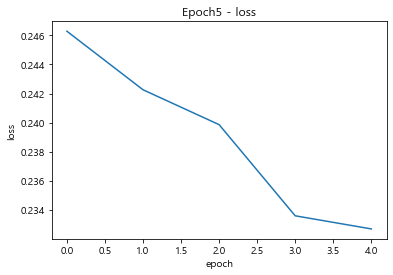

In [33]:
# 손실(loss) 곡선 그리기 
# 손실률 (손실계수)의 변화 확인가능
import matplotlib.pyplot as plt

# 한글처리 
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")

plt.plot(history5.epoch, history5.history["loss"])
plt.title("Epoch5 - loss")
plt.xlabel("epoch")
plt.ylabel("loss")

#그래프 저장하기 => 웹에서 저장한 그래프 보여주기 
# 손실은 우하향 그래프가 좋은 결과
plt.savefig("./images/01_Epoch5Loss", dpi=300)
plt.show()

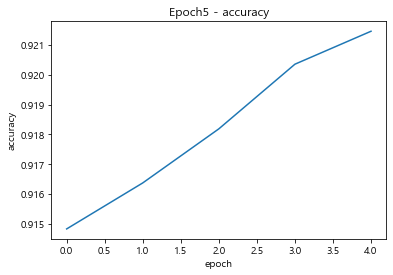

In [35]:
# 정확도(accuracy) 곡선 그리기
# 정확도의 변화 확인 가능 
plt.plot(history5.epoch, history5.history["accuracy"])
plt.title("Epoch5 - accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")

#그래프 저장하기 => 웹에서 저장한 그래프 보여주기 
# 정확도는 우상향 그래프가 좋은 결과
plt.savefig("./images/01_Epoch5Accuracy", dpi=300)
plt.show()

In [37]:
# 새로 모델 생성하고 
# 반복횟수 20회로 훈련시킨 후 
# 손실곡선과 정확도 곡선 그리기 

model20 = model_fn()
model20.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")
history20 = model20.fit(train_scaled, train_target, epochs=20, verbose=1)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5374 - accuracy: 0.8116
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3559 - accuracy: 0.8722
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8788
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3204 - accuracy: 0.8852
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3054 - accuracy: 0.8906
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2964 - accuracy: 0.8946
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2880 - accuracy: 0.8989
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9008
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.273

In [52]:
def drow_plot(history_n) :
    name_list = ["loss", "accuracy"]
    for name in name_list :
        plt.plot(history_n.epoch, history_n.history[name])
        plt.title("Epoch5 - {}".format(name))
        plt.xlabel("epoch")
        plt.ylabel(name)
        plt.savefig("./images/01_Epoch20{}".format(name), dpi=300)
        plt.show()

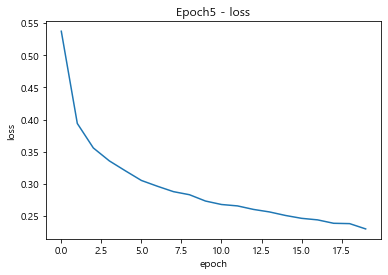

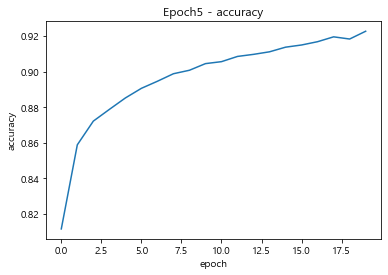

In [53]:
drow_plot(history20)

In [41]:
# 모델 훈련 및 검증을 동시에 수행하기 
model = model_fn()
model.compile(loss="sparse_categorical_crossentropy",
             metrics="accuracy")

# 훈련과 검증을 동시에 훈련
history = model.fit(train_scaled, train_target,epochs=20, verbose=1,
                   validation_data=(val_scaled, val_target))
history.

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5291 - accuracy: 0.8129 - val_loss: 0.4205 - val_accuracy: 0.8521
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3913 - accuracy: 0.8592 - val_loss: 0.3847 - val_accuracy: 0.8652
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3553 - accuracy: 0.8723 - val_loss: 0.3931 - val_accuracy: 0.8653
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3326 - accuracy: 0.8796 - val_loss: 0.3787 - val_accuracy: 0.8700
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3192 - accuracy: 0.8862 - val_loss: 0.3751 - val_accuracy: 0.8687
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3077 - accuracy: 0.8905 - val_loss: 0.3679 - val_accuracy: 0.8794
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8944 - val_loss: 0.4015 - val_accuracy:

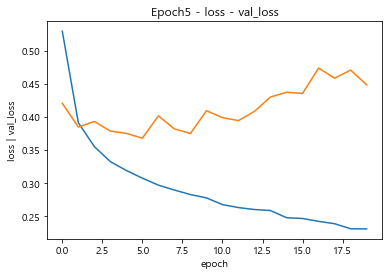

In [54]:
# 훈련 및 검증에 대한 손실곡선을 하나의 그래프에 그리기
history.history.keys()

plt.plot(history.epoch, history.history['loss'], history.history['val_loss'])
plt.title("Epoch5 - loss - val_loss")
plt.xlabel("epoch")
plt.ylabel("loss | val_loss")
plt.savefig("./images/01_Epoch20_loss&val_loss", dpi=300)
plt.show()